4. **Take any image and apply the Fourier Transform to this image and the following filters:( Python or MATLAB)**

(b) Butterworth filters

(c) Gaussian filters

In [1]:
pip install opencv-python numpy matplotlib


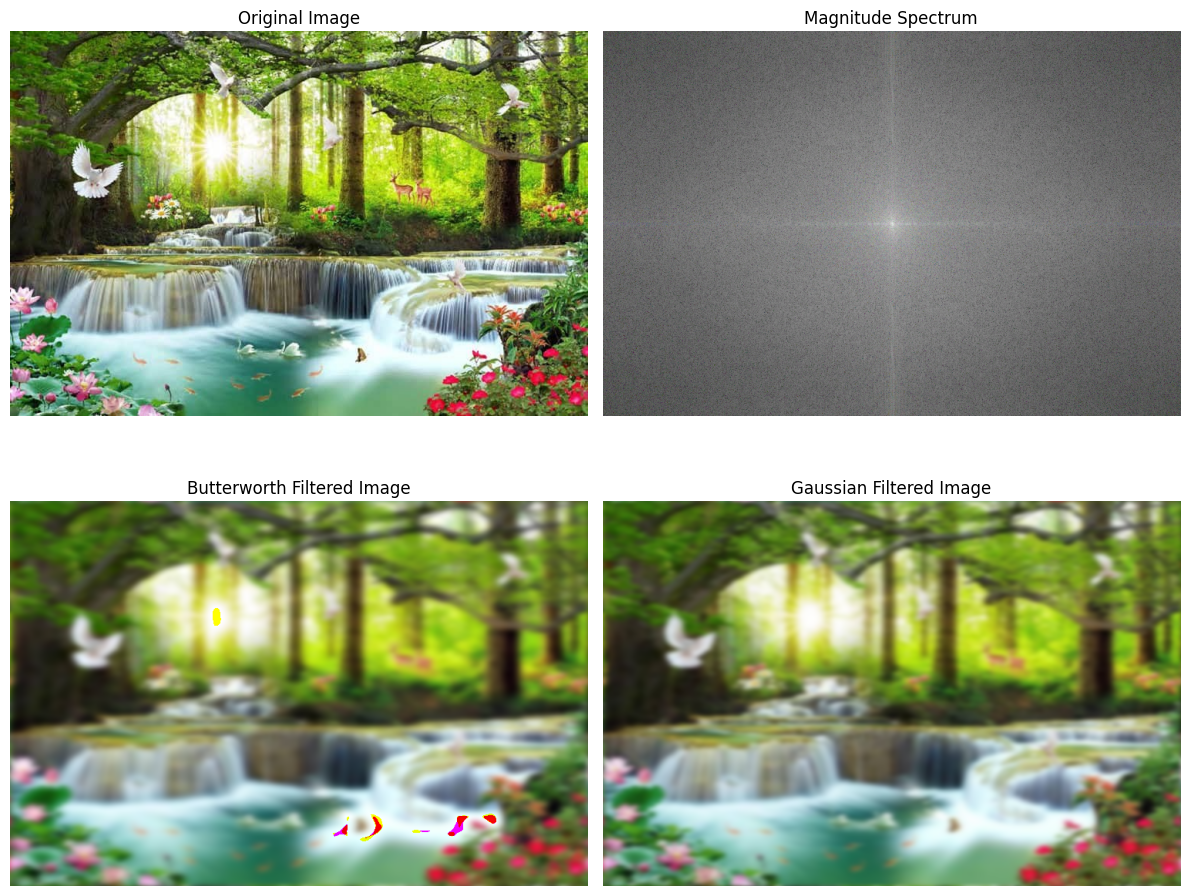

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to create Butterworth filter
def butterworth_filter(shape, cutoff, order=2):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(0, rows, 1)
    y = np.arange(0, cols, 1)
    X, Y = np.meshgrid(y - ccol, x - crow)
    D = np.sqrt(X**2 + Y**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

# Function to create Gaussian filter
def gaussian_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(0, rows, 1)
    y = np.arange(0, cols, 1)
    X, Y = np.meshgrid(y - ccol, x - crow)
    D = np.sqrt(X**2 + Y**2)
    H = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H

# Load the image
image_path = '/content/Waterfalls.jpg'
image = cv2.imread(image_path)

# Convert the image to float32 for better precision
image_float = np.float32(image)

# Perform Fourier Transform on each color channel
f = np.fft.fft2(image_float, axes=(0, 1))
fshift = np.fft.fftshift(f)

# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(fshift)
magnitude_spectrum = 20 * np.log(magnitude_spectrum + 1)  # Use log scale for better visibility

# Normalize the magnitude spectrum for better visualization
magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Define filter parameters
cutoff_frequency = 30  # Cutoff frequency for the filters
order = 2  # Order for the Butterworth filter

# Create filters
butter_filter = butterworth_filter(image.shape[:2], cutoff_frequency, order)
gaussian_filter = gaussian_filter(image.shape[:2], cutoff_frequency)

# Apply filters to each color channel
butter_filtered = fshift * butter_filter[:, :, np.newaxis]
gaussian_filtered = fshift * gaussian_filter[:, :, np.newaxis]

# Inverse Fourier Transform to get the filtered images
butter_inverse = np.fft.ifft2(np.fft.ifftshift(butter_filtered), axes=(0, 1))
gaussian_inverse = np.fft.ifft2(np.fft.ifftshift(gaussian_filtered), axes=(0, 1))

# Calculate the magnitude of the filtered images
butter_filtered_image = np.abs(butter_inverse).astype(np.uint8)
gaussian_filtered_image = np.abs(gaussian_inverse).astype(np.uint8)

# Display the results
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Butterworth Filtered Image")
plt.imshow(cv2.cvtColor(butter_filtered_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Gaussian Filtered Image")
plt.imshow(cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')

plt.tight_layout()
plt.show()
